# **LAB 8 - Pancakes With A Problem!**

Juan Esteban Alarcón Bravo
$$ $$

---

![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

## _Imports y Utilidades_

In [1]:
import itertools
import numpy as np
from copy import deepcopy
import pydot
from collections import defaultdict 
from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

## **1. Plot the Pancake Network and calculate $P_n$ for small $n$s**

### 1.1. Pancake Network

In [3]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph",simplify=True)
        lev =dict()
        a=0
        lev[lstr(s)]=0
        
        # Create a queue for BFS <
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True

        
        while queue:

            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the dequeued vertex s. If a adjacent has not been visited, then mark it visited and enqueue it 
            if (s != sorted(s)):

              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  lev[lstr(d)]=1 +lev[lstr(s)]
                  a+=1
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                  queue.append(d) 
                  visited[lstr(d)] = True
                  graph[lstr(s)].append(lstr(d))
                G.add_node(node)
                edge = pydot.Edge(lstr(s),lstr(d))
                G.add_edge(edge)
            else:
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):

                  lev[lstr(d)]=1 +lev[lstr(s)]
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled",bgcolor="green", ) # first sorted green
                    
                  queue.append(d) 
                  visited[lstr(d)] = True
                  graph[lstr(s)].append(lstr(d)) 
                G.add_node(node)
                edge = pydot.Edge(lstr(s),lstr(d))
                G.add_edge(edge)

        Pn=lev[lstr(s)]
        node = G.get_node(lstr(s))
        node[0].set_color("blue")
        
        # Dsplay the pydot graph G
        print("Pn = ",Pn)
        im = Image(G.create_png())
        display(im)
        print("\n")

Pn =  1


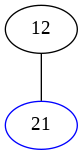



Pn =  3


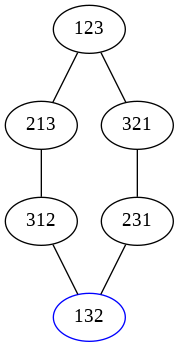



Pn =  4


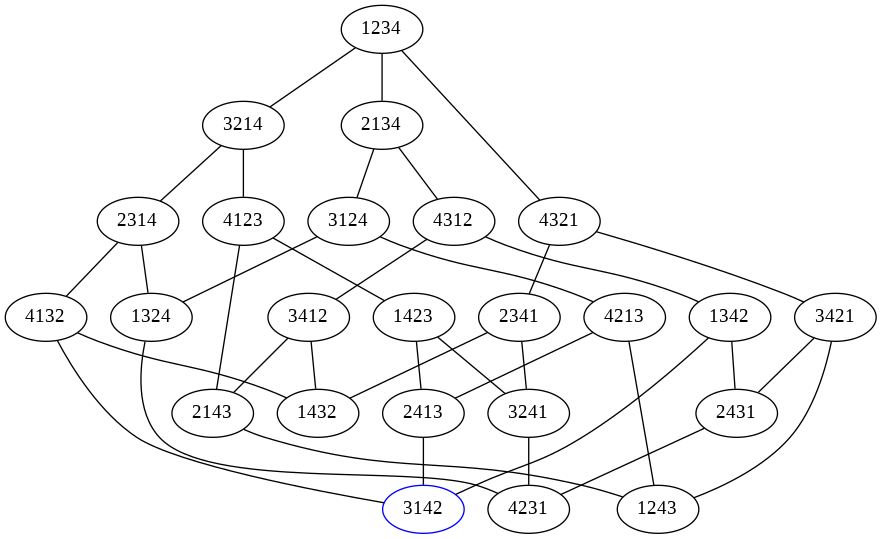



Pn =  5


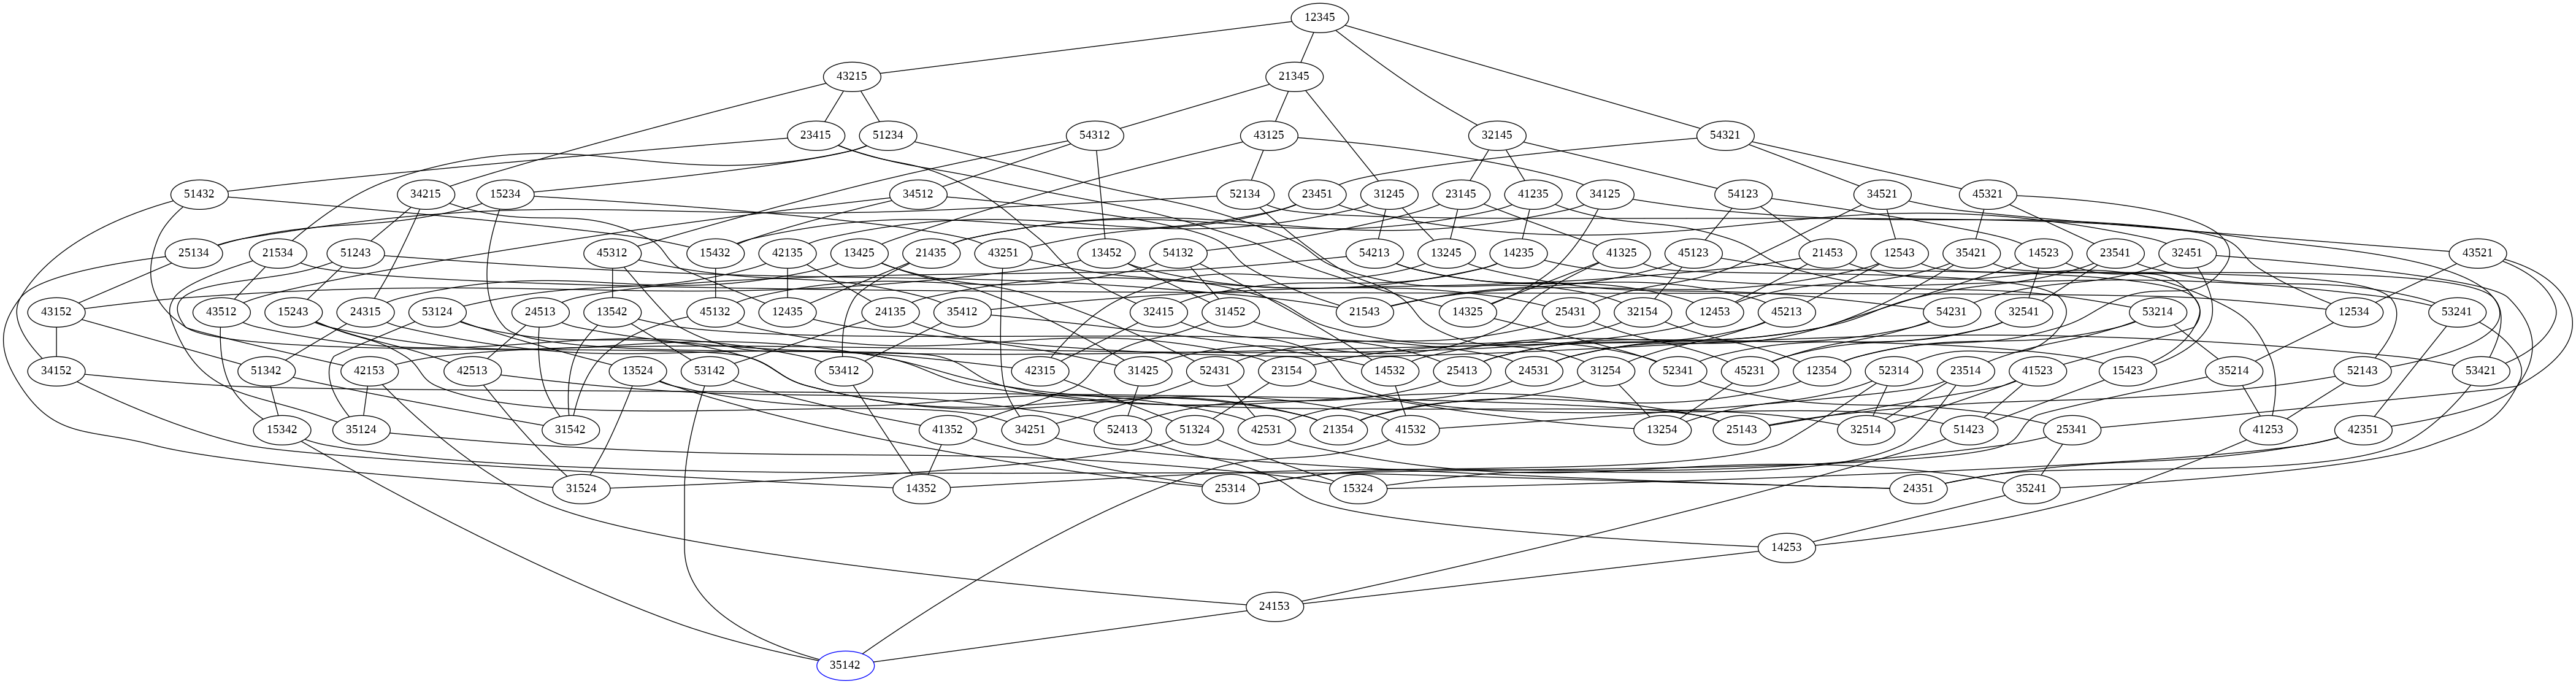

In [4]:
ModifiedBFS([1,2])
ModifiedBFS([1,2,3])
ModifiedBFS([1,2,3,4])
ModifiedBFS([1,2,3,4,5])

### 1.2. $P_n$ for small $n$s

In [5]:
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
              
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        lev = dict()
        lev[lstr(s)]=0
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:]  
              if (d != s) and not(lstr(d) in visited.keys()):
                lev[lstr(d)]=1 +lev[lstr(s)]

                edge = pydot.Edge(lstr(s),lstr(d))
                graph[lstr(s)].append(lstr(d))
                queue.append(d) 
                visited[lstr(d)] = True 
        Pn=lev[lstr(s)]
        print("Pn = ",Pn)

In [6]:
p = [1]
i = 1
while len(p) < 9:
  print(p)
  print("n = ",len(p))
  ModifiedBFSPreSols(p)
  p.append(i+1)
  print("\n")
  i+=1

[1]
n =  1
Pn =  0


[1, 2]
n =  2
Pn =  1


[1, 2, 3]
n =  3
Pn =  3


[1, 2, 3, 4]
n =  4
Pn =  4


[1, 2, 3, 4, 5]
n =  5
Pn =  5


[1, 2, 3, 4, 5, 6]
n =  6
Pn =  7


[1, 2, 3, 4, 5, 6, 7]
n =  7
Pn =  8


[1, 2, 3, 4, 5, 6, 7, 8]
n =  8
Pn =  9




## **2. Calculate the $P_n$ and run the code for at least one night (8 hours)**

Definimos una nueva función que hace el algoritmo de Pancake Sorting y cuenta el número de pasos que se requieren para completarlo.

In [7]:
def flip(arr, i):
    start = 0
    while start < i:
        temp = arr[start]
        arr[start] = arr[i]
        arr[i] = temp
        start += 1
        i -= 1

def findMax(arr, n):
    indexMax = 0
    for i in range(0,n):
        if arr[i] > arr[indexMax]:
            indexMax = i
    return indexMax
 
# Pancake Sorting
def pancakeSort(arr):

  p = 0
  currentSize = len(arr)
  out = deepcopy(arr)

  while currentSize > 1:
    # Find index of the maximum element in arr[0..currentSize-1]
    indexMax = findMax(arr, currentSize)

    # Move the maximum element to end of current array if it's not already at the end
    if indexMax+1 != currentSize:
      if indexMax!=0:
        p += 1
        flip(arr, indexMax)
      p += 1
      flip(arr, currentSize-1)
    currentSize -= 1
  
  # print("\t",out,"\tFlips =",p)
  PnOutput.write(str("\t{0}\tFlips = {1}\n".format(out,p)))

  return p

Creamos un arreglo de tamaño $n$ con los elementos de $0$ a $n$. Este nos servirá como base para crear todas su posibles permutaciones.

In [8]:
def nListing(n):
  baseArray = []
  for i in range(0,n):
    baseArray.append(n)
    n -= 1
  return baseArray

Hacemos el Pancake Sorting e ¡n todas las posibles permutaciones del arreglo creado previamente. Esto significa que si el arreglo es de tamaño $n$, esta función hará $n!$ cálculos.

In [9]:
def PnCalculator(n):
  
  # print("n =",n)
  PnOutput.write(str("n = {0}\n".format(n)))

  ori = nListing(n)
  nCollection = []
  for i in range(0,len(list(itertools.permutations(ori)))):
    nCollection.append(pancakeSort(np.asarray(list(itertools.permutations(ori))[i])))
  # print("Pn =",max(nCollection),"\n")
  # print()
  PnOutput.write("\n")

Guardamos los resultados para todos los $n$ que se puedan en las 8 horas de simulación en el archivo de nombre ```PnOutput.pn```.



In [10]:
# PnOutput = open("PnOutput.pn","a")

# -------------------------------------------
# ---   GENERADOR DEL ARCHIVO DE SALIDA   ---
# ---       NO EJECUTAR OTRA VEZ          ---
# -------------------------------------------

# PnCalculator(2)
# PnCalculator(3)
# PnCalculator(4)
# PnCalculator(5)
# PnCalculator(6)
# PnCalculator(7)
# PnCalculator(8)
# PnCalculator(9)
# PnCalculator(10)
# PnCalculator(11)
# PnCalculator(12)
# PnCalculator(13)
# PnCalculator(14)
# PnCalculator(15)

# -------------------------------------------

# PnOutput.close()

## **3. Plot the pancakes trees using two spatulas**

In [11]:
def ModifiedBFSPreSolsLevel(s,L): 
    #ModifiedBFSPreSolsLevel 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:]
              if (d == sorted(d)):
                flag = True
            if flag:
                node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
                node = pydot.Node(lstr(s))

            G.add_node(node)
              
              # Get all adjacent vertices of the 
              # dequeued vertex s. If a adjacent 
              # has not been visited, then mark it 
              # visited and enqueue it 
            if (s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                  d = s[:i]+s[j:i:-1] + s[i:i+1]+s[j+1:]  
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if (d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append([d,l+1]) 
                    visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

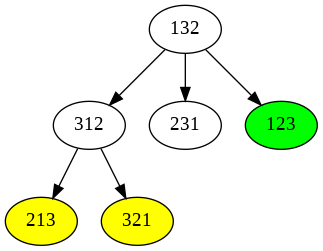

In [12]:
p = [1,3,2]
ModifiedBFSPreSolsLevel(p,2)

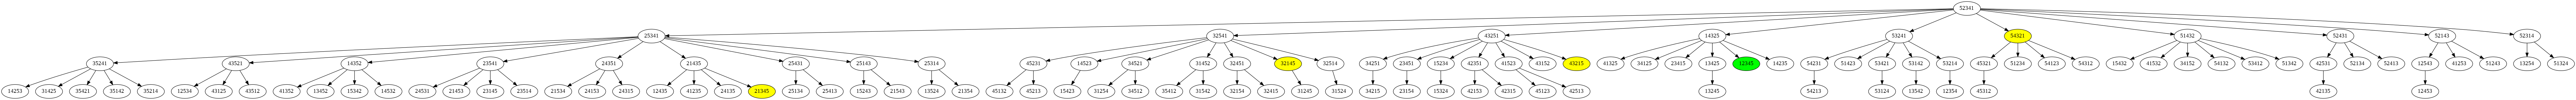

In [13]:
p = [5,2,3,4,1]
ModifiedBFSPreSolsLevel(p,3)

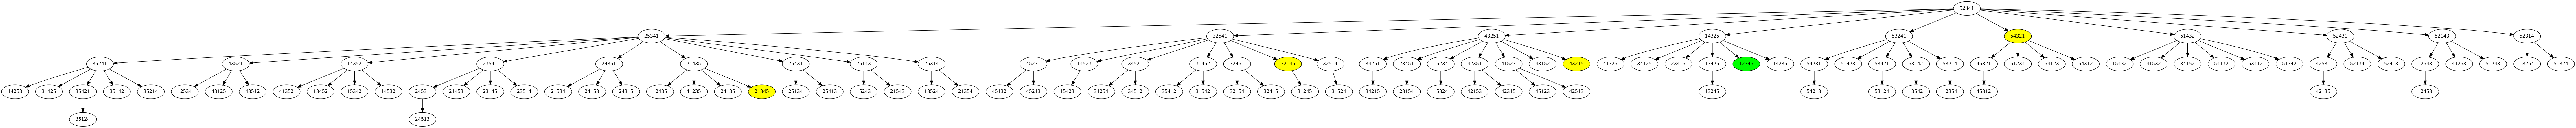

In [14]:
ModifiedBFSPreSolsLevel(p,5)

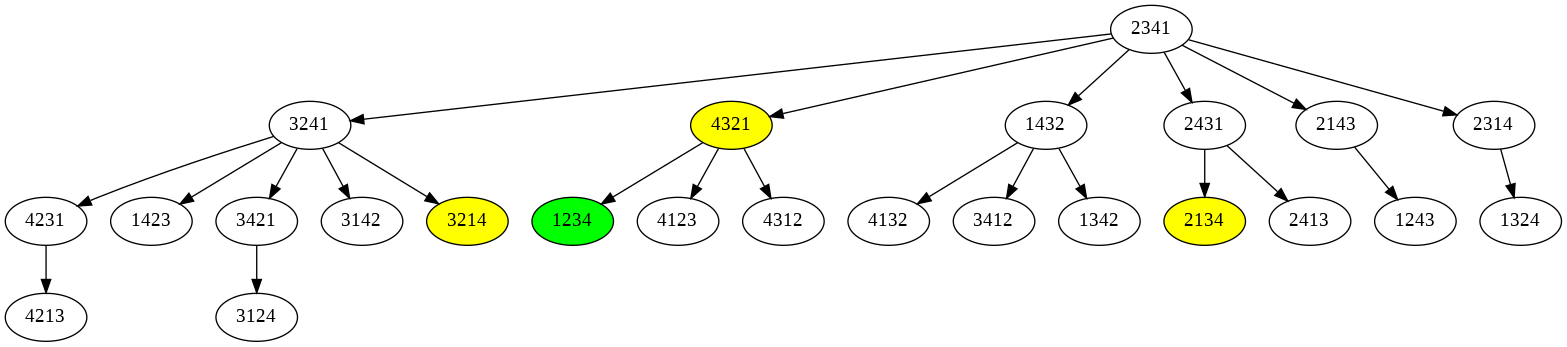

In [15]:
p = [2,3,4,1]
ModifiedBFSPreSolsLevel(p,5)

## **References**

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/